In [ ]:
# pip install keras_tuner pandas tensorflow scikit-learn distutils-pytest matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2025-01-04 01:23:08.675767: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-04 01:23:08.691477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735950188.711310   15256 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735950188.715094   15256 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 01:23:08.727069: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
data = pd.read_csv("scraped_questionsfv.csv")
# data = shuffle(data)
# print(data.info())
# data=data.drop_duplicates()
# data = data.dropna()
# print(data.info())

finalistion du preprocesing du data en eliminant les pints d'interogation

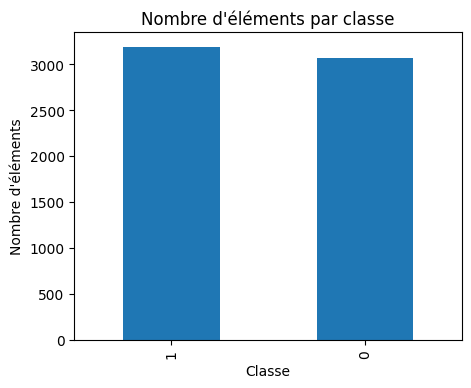

In [4]:
efectifs = data["personal"].value_counts()
plt.figure(figsize=(5, 4))
efectifs.plot(kind='bar')
plt.title('Nombre d\'éléments par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'éléments')

plt.show()

on remarque que notre data est bien partitionée entre les deux classes

In [5]:
data['question'] = data['question'].str.replace('?', ' ', regex=False)

In [6]:
data

,Unnamed: 0.1,Unnamed: 0,question,personal
0,6529,48280.0,How do you handle moments when things don’t go...,1
1,670,878.0,How easy it is to make you fall for someone,1
2,2446,2339.0,How do you build a successful career,1
3,4354,1062.0,How different are you from your family,1
4,6933,88685.0,How do you manage your emotions in high-pressu...,1
...,...,...,...,...
6251,4243,1035.0,What animal is on Levi’s logo,0
6252,2109,2095.0,What is the scientific term for the study of s...,0
6253,1712,483.0,What is the worst compliment you have ever rec...,1
6254,4686,3144.0,Where can I find a bus schedule,0


division des donnés entre les donnés d'entrainement et les données de test:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data["question"],data["personal"], test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5004,)
(1252,)
(5004,)
(1252,)


In [9]:
# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)
X_train , X_test

(array([[  0,   0,   0, ..., 476,  27, 117],
        [  0,   0,   0, ..., 141,   5, 315],
        [  0,   0,   0, ...,  59, 164, 165],
        ...,
        [  0,   0,   0, ..., 249, 222, 173],
        [  0,   0,   0, ...,  20, 388, 168],
        [  0,   0,   0, ..., 292,   8, 798]], dtype=int32),
 array([[   0,    0,    0, ...,  113,    5,   97],
        [   0,    0,    0, ...,   75,   26, 1215],
        [   0,    0,    0, ...,   40,  447,  124],
        ...,
        [   0,    0,    0, ...,  488,   10,  147],
        [   0,    0,    0, ...,   46,   10,  676],
        [   0,    0,    0, ...,    1, 2147,  316]], dtype=int32))

In [10]:
print(y_train)
type(y_train)

416     1
4024    0
6239    1
2572    1
564     1
       ..
3772    0
5191    0
5226    1
5390    1
860     1
Name: personal, Length: 5004, dtype: int64


pandas.core.series.Series

construire le model:

In [11]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/home/natsu/Desktop/mohamed projet/.env/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
W0000 00:00:1735950248.655880   15256 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

compiler le miodel:

In [13]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [14]:
# Convert type to numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
# Ensure the dtype is correct
y_train = y_train.astype('int')
y_test = y_test.astype('int')
# Convert to a TensorFlow tensor
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [15]:
# Training the model while saving metric statistics
history=model.fit(X_train, y_train, epochs=35, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5518 - loss: 0.6948 - val_accuracy: 0.7708 - val_loss: 0.5627
Epoch 2/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6978 - loss: 0.5979 - val_accuracy: 0.8482 - val_loss: 0.4517
Epoch 3/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.8014 - loss: 0.4921 - val_accuracy: 0.9217 - val_loss: 0.3082
Epoch 4/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8872 - loss: 0.3638 - val_accuracy: 0.9297 - val_loss: 0.1989
Epoch 5/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.9173 - loss: 0.2520 - val_accuracy: 0.9449 - val_loss: 0.1440
Epoch 6/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9424 - loss: 0.1722 - val_accuracy: 0.9728 - val_loss: 0.1007
Epoch 7/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9648 - loss: 0.1230 - val_accuracy: 0.9776 - val_loss: 0.0805
Epoch 8/35
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9697 - loss: 0.1006 - val_accu

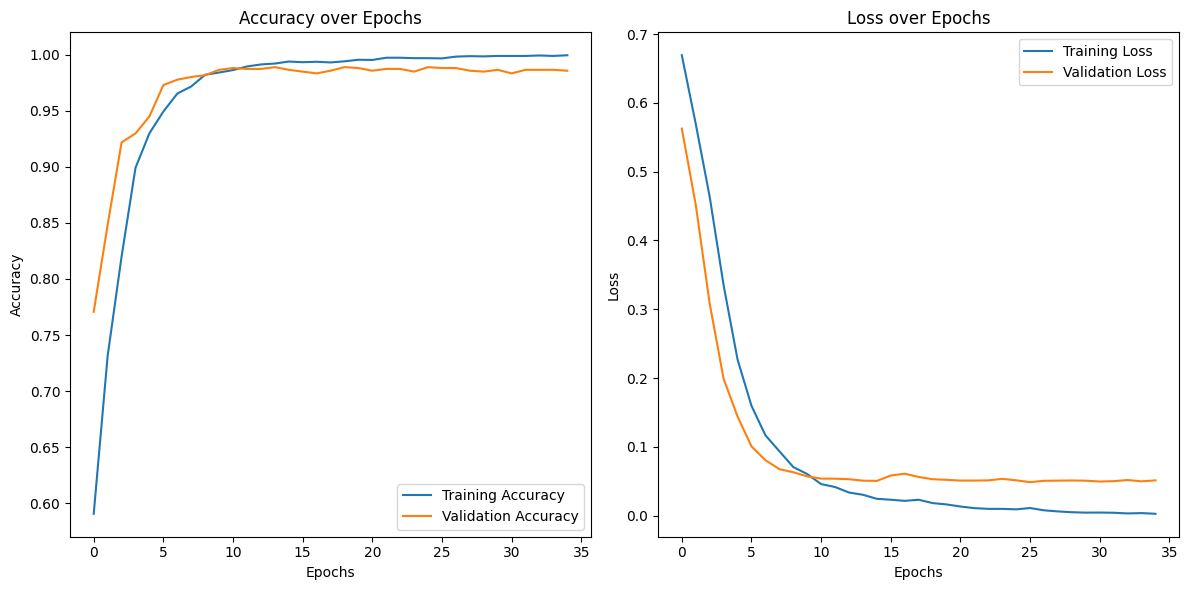

In [16]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9901 - loss: 0.0225
Test Loss: 0.05120379105210304
Test Accuracy: 0.9856230020523071


In [21]:
import numpy as np
predictions = model.predict(X_test)
y_pred = np.array([1 if i>=0.5 else 0 for i in predictions])
y_pred = tf.convert_to_tensor(y_pred)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9856230031948882

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       595
           1       0.99      0.98      0.99       657

    accuracy                           0.99      1252
   macro avg       0.99      0.99      0.99      1252
weighted avg       0.99      0.99      0.99      1252



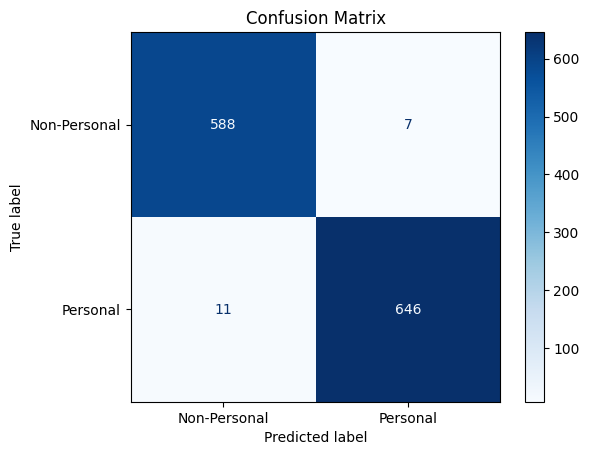

In [23]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Personal', 'Personal'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Defining a function for prediction
def predict_question(question):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([question])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  result = "personal" if prediction[0][0] > 0.5 else "not personal"
  return result

In [19]:
# Trying the model with an example question
new_review = "what's the bayes theorem?"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
this question is: not personal


In [20]:
# Trying with a personal question
new_review = "what's the name of your parents?"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
this question is: personal


In [21]:
# Trying a harder one
new_review = "how much can you process at once?"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
this question is: personal


In [22]:
# Non personal question
new_review = "Who is the author of Harry Potter?"
r= predict_question(new_review)
print(f"this question is: {r}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
this question is: not personal
